<a href="https://colab.research.google.com/github/meghamkpatel/INFO_7390_Art_and_Science_of_Data/blob/main/Understanding_Data/Data_Sampling_Worked_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Starbucks Membership Card Example

##Abstract
Let's use our methods again on a starbucks dataset. This dataset is the results of a survey taken by Starbucks for respondent's buying behavior.
This study aims to gather demographic information about customers, including gender, age range, employment status, and income range, and analyze how these factors relate to their current purchasing behavior at Starbucks. Additionally, we will investigate the specific facilities and features of Starbucks locations that play a significant role in influencing customer behavior.

Reference: hhttps://www.kaggle.com/datasets/mahirahmzh/starbucks-customer-retention-malaysia-survey/data

###The Data:
* Id (numeric): primary identifier for the survey response
* gender (numeric): gender of the respondee
*age (numeric): age of the respondee grouped
*status (numeric): job status of the respondee
*income (numeric): yearly salary of respondee
*visitNo (numeric): number of times respondee visits
*method (numeric): method of ordering used by respondee
*timeSpend (numeric): time spent within the store
*location (numeric): distance travelled to visit the current location
*membershipCard (numeric): whether the respondee owns a membership card
*itemPurchaseCoffee (numeric): whether the respondee bought coffee in this visit
*itempurchaseCold (numeric): whether the respondee bought iced drink in this visit
*itemPurchasePastries (numeric): whether the respondee bought a pastry in this visit
*itemPurchaseJuices (numeric): whether the respondee bought a juice in this visit
*itemPurchaseSandwiches (numeric): whether the respondee bought a sandwich in this visit
*itemPurchaseOthers (numeric): whether the respondee bought anything else that is not a coffee, pastry, juice, sandwich in this visit
*spendPurchase (numeric): how much the repondee spent this visit
*productRate (numeric): what the respondee rated their purchased items
*priceRate (numeric): what the respondee rated the price of the items
*promoRate (numeric): what the respondee rated the current promo
*ambianceRate (numeric): what the respondee rated the ambiance of the location
*wifiRate (numeric): what the respondee rated the internet quality
*serviceRate (numeric): what the respondee rated the service of the location
*chooseRate (numeric): how likely the respondee will choose the location again
*promoMethodApp (numeric): did the respondee hear about the promo through the mobile app
*promoMethodSoc (numeric): did the respondee hear about the promo through social media
*promoMethodEmail (numeric): did the respondee hear about the promo through email
*promoMethodDeal (numeric): did the respondee earn the promo as a deal
*promoMethodFriend (numeric): did the respondee hear about the promo through a friend
*promoMethodDisplay (numeric): did the respondee hear about the promo through in store displays
*promoMethodBillboard (numeric): did the respondee hear about the promo through billboards
*promoMethodOthers (numeric): did the respondee hear about the promo through another platform
*loyal (numeric): whether the respondee will continue buying from starbucks



## Simple Random Sampling

Simple random sampling is a widely used technique in statistics and research when you want to select a subset of data or individuals from a larger population for analysis. It is best when the population has little variation between individuals or elements. Random sampling ensures that every unit has an equal opportunity to be selected. This method is often used in preliminary data collection or exploratory research to gain initial insights or determine the need for more complex sampling methods. Random sampling is initially used when you have limited prior knowledge about the population or you don't have specific characteristics to stratify by and want to ensure an unbiased representation.



In [51]:
# libraries

import numpy as np
import pandas as pd
import random as rd
import os
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
df = pd.read_csv('/content/sample_data/Starbucks satisfactory survey encode cleaned.csv')

We performed preprocessing on the starbucks dataset, encoding categorical attributes to numerical values. There are no null values and the ranges for each attribute are rational.

In [52]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Id                      113 non-null    int64
 1   gender                  113 non-null    int64
 2   age                     113 non-null    int64
 3   status                  113 non-null    int64
 4   income                  113 non-null    int64
 5   visitNo                 113 non-null    int64
 6   method                  113 non-null    int64
 7   timeSpend               113 non-null    int64
 8   location                113 non-null    int64
 9   membershipCard          113 non-null    int64
 10  itemPurchaseCoffee      113 non-null    int64
 11  itempurchaseCold        113 non-null    int64
 12  itemPurchasePastries    113 non-null    int64
 13  itemPurchaseJuices      113 non-null    int64
 14  itemPurchaseSandwiches  113 non-null    int64
 15  itemPurchaseOthers     

,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,...,chooseRate,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,...,113.000000,113.0,113.0,113.0,113.0,113.0,113.0,113.0,113.000000,113.000000
mean,60.150442,0.522124,1.185841,1.221239,0.761062,2.557522,1.070796,0.610619,1.274336,0.469027,...,3.539823,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.991150,0.203540
std,35.566392,0.501735,0.675445,0.932877,1.087874,0.718854,0.979402,0.849723,0.804538,0.501263,...,1.026744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.094072,0.404424
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000
25%,29.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,3.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000
50%,60.000000,1.000000,1.000000,2.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,...,4.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000
75%,90.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,...,4.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000
max,122.000000,1.000000,3.000000,3.000000,4.000000,3.000000,5.000000,4.000000,2.000000,1.000000,...,5.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000


Now, let's sample randomly. We will use the ```sample()``` function from the pandas library to randomly select 70% values from the Starbucks dataset.

Parameters:
* n: the number of items in the sample
* replace: whether the elements of the table can be inserted into the sample more than once
* random_state: whether the elements should change everytime the function is executed



In [90]:
df_sample_random = df.sample(n = int(len(df)*.70), replace = False, random_state = None)
df_sample_random.describe()

,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,...,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal,cluster
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.00000,79.000000,79.000000,...,79.0,79.0,79.0,79.0,79.0,79.0,79.0,79.000000,79.000000,79.000000
mean,58.708861,0.582278,1.164557,1.291139,0.810127,2.582278,1.050633,0.56962,1.265823,0.430380,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.987342,0.227848,2.012658
std,35.831211,0.496335,0.649070,0.935783,1.050957,0.690737,0.918454,0.87242,0.811912,0.498293,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112509,0.422124,1.489223
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000
25%,25.500000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.00000,1.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,1.000000
50%,59.000000,1.000000,1.000000,2.000000,0.000000,3.000000,1.000000,0.00000,1.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,2.000000
75%,89.500000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.00000,2.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,3.000000
max,120.000000,1.000000,3.000000,3.000000,4.000000,3.000000,2.000000,4.00000,2.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,5.000000


<Figure size 640x480 with 0 Axes>

<Figure size 10000x5000 with 0 Axes>

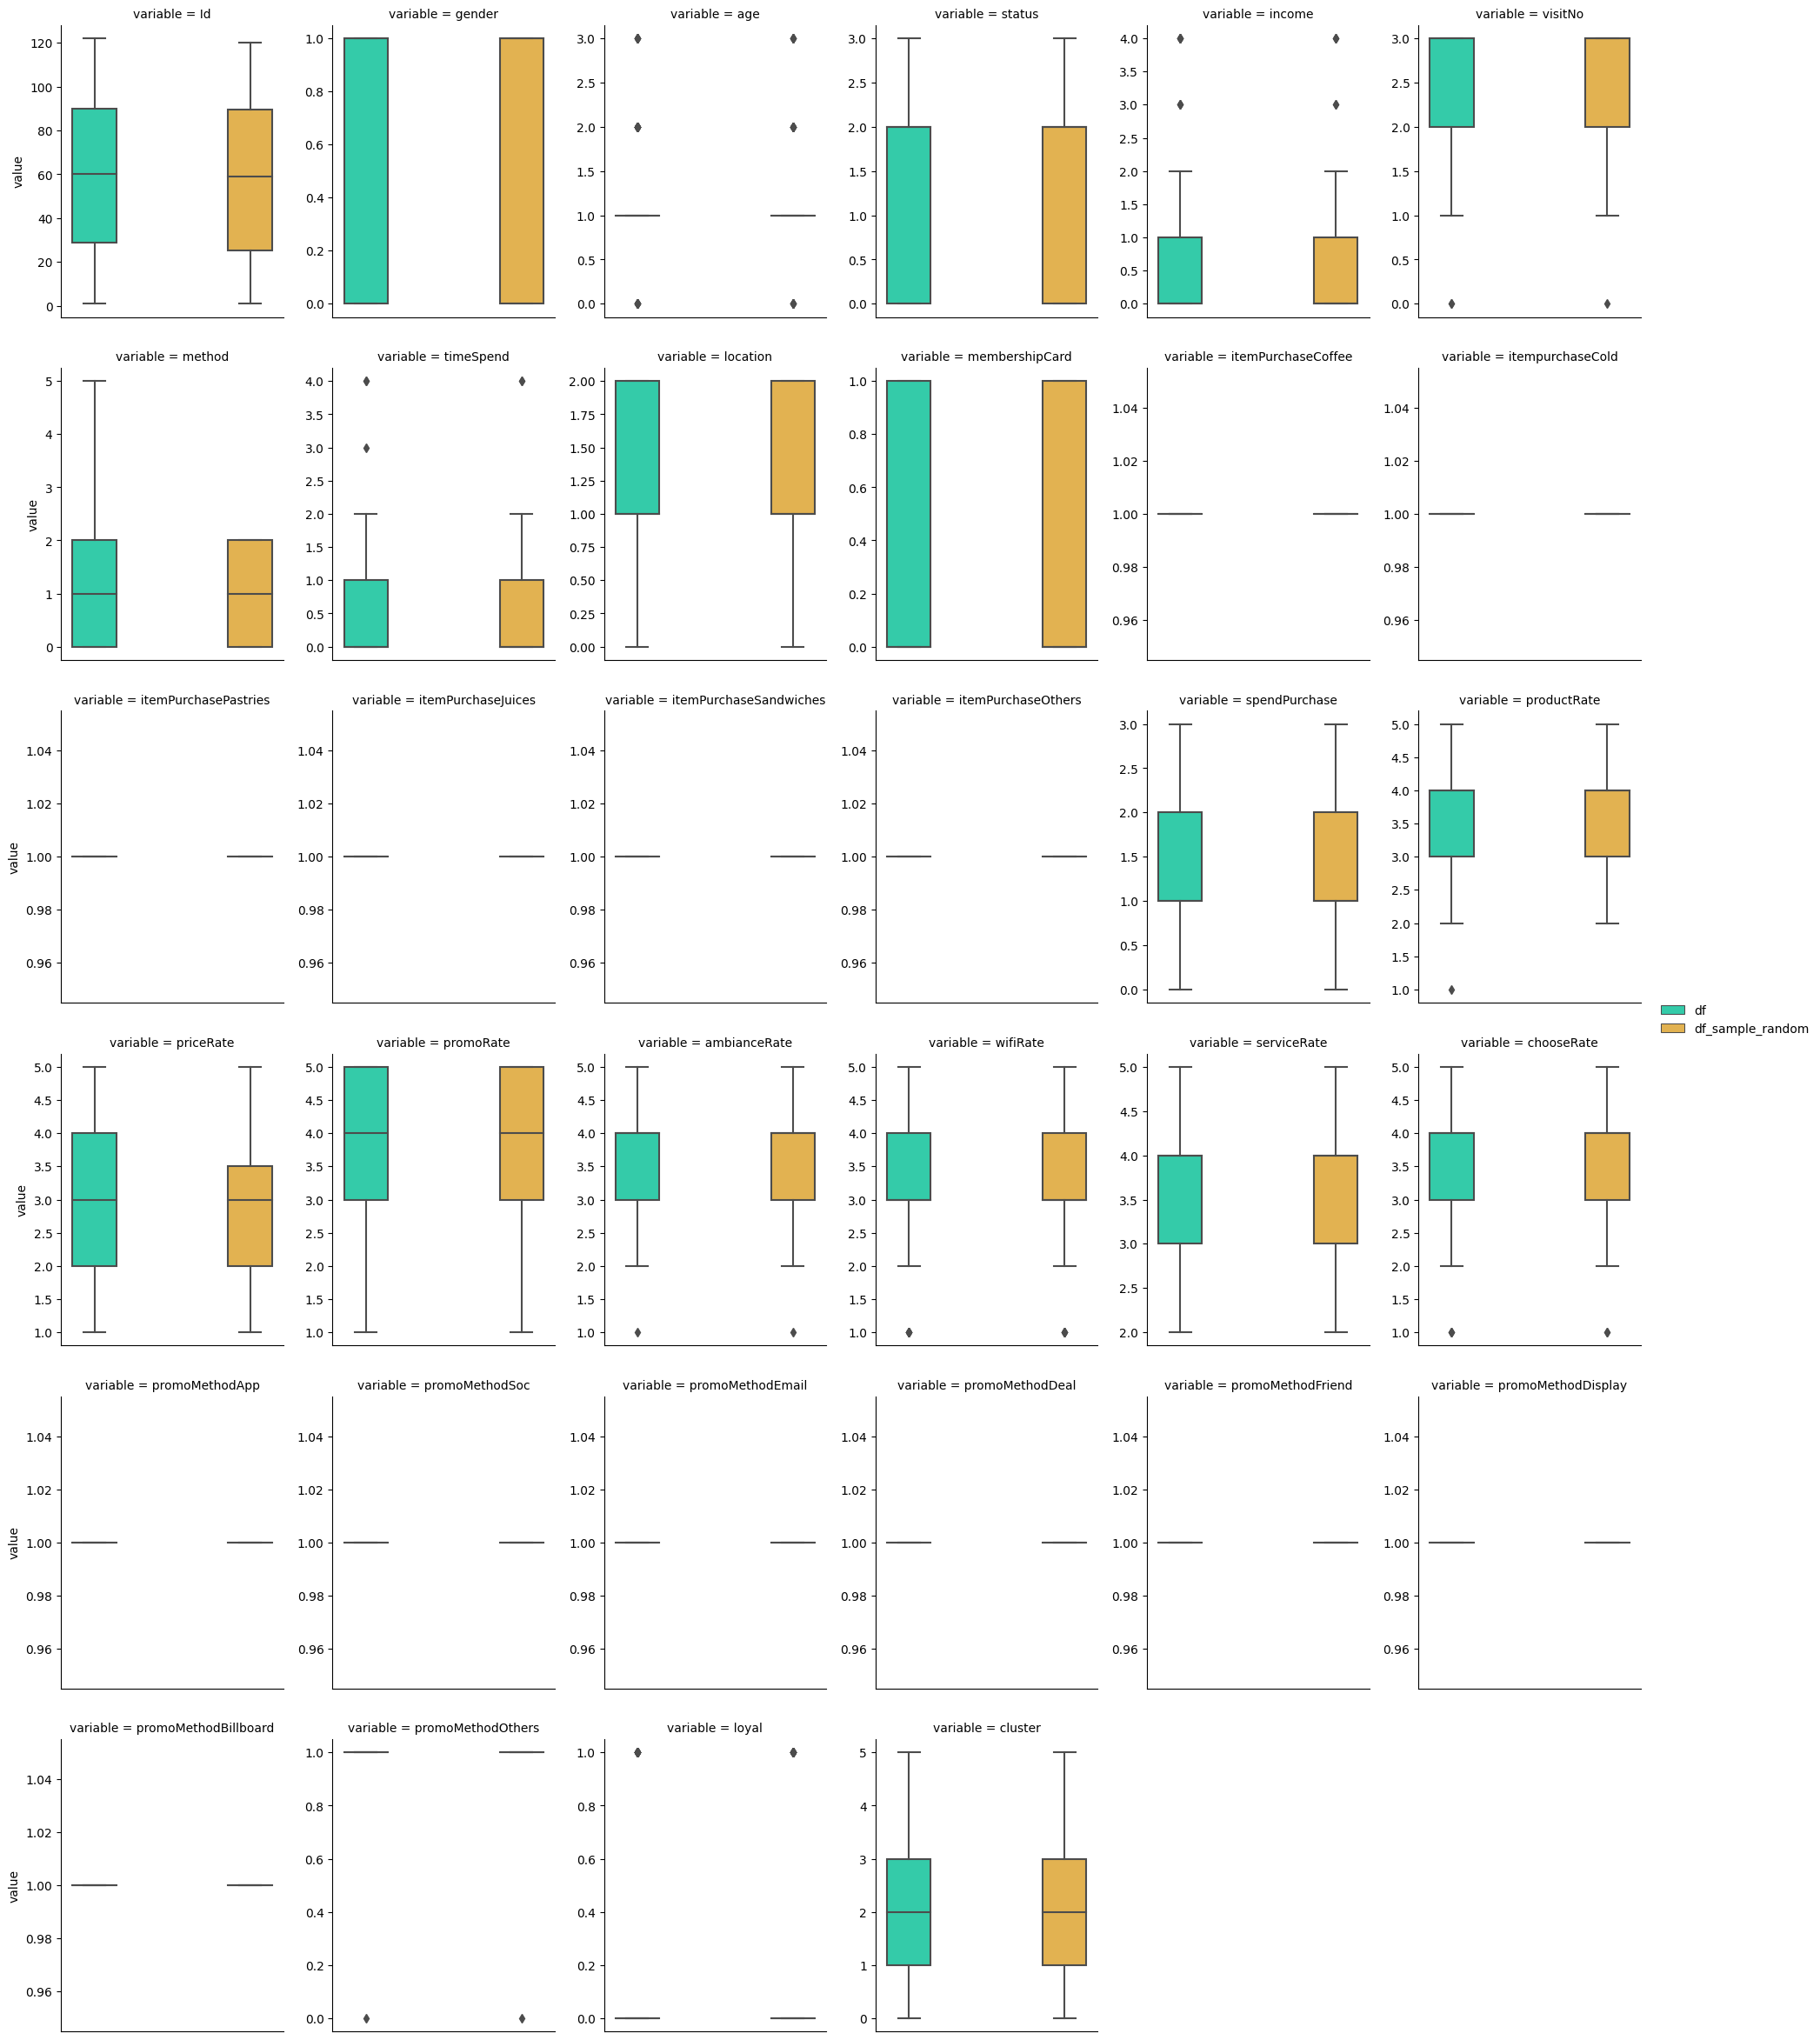

In [91]:
fig = plt.figure()
plt.figure(figsize=(100,50))
df2 = pd.concat({'df': df.melt(), 'df_sample_random': df_sample_random.melt()}, names=['source', 'old_index'])
df2 = df2.reset_index(level=0).reset_index(drop=True)

t = sns.catplot(data=df2, kind='box', col='variable', y='value', x='source', palette='turbo',hue='source', legend = 'brief', height=4, aspect=0.8, col_wrap=6, sharey=False)
t.set(xlabel='', xticks=[]) # remove x labels and ticks
t.add_legend()

While many of the attributes have similar distributions across the attributes, we see price rate to be skewed left for the sampled data. There may be some sampling error due to priceRate not capturing the same distribution as priceRate. Looking specifically at the loyal attribute, we see that the mean and standard deviation for the sampled set are slightly higher than the original dataset's loyal attribute.

While simple random sampling has its advantages, it's important to recognize its limitations as well. It may not be the best choice when the population is large and diverse, when stratification is necessary to ensure representation of subgroups, or when the cost of data collection is a significant concern. In such cases, more advanced sampling methods like stratified sampling or cluster sampling may be more appropriate.

## Stratified Sampling


Stratified sampling is a valuable sampling technique used when you want to ensure that your sample accurately represents different subgroups or strata within a population. It is particularly useful in situations where the population has inherent variability or when you want to study specific subpopulations separately. By focusing on each subgroup, we can reduce the overall variability in estimates compared to simple random sampling.

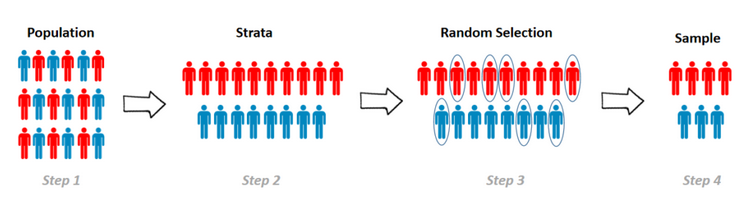

To perform stratified sampling effectively, follow these steps:

1. Identify the relevant subgroups or strata within your population.
2. Determine the sample size or proportion you want to allocate to each stratum. This can be based on the stratum's size in the population or other criteria.
3. Randomly sample from each stratum independently. You can use techniques like simple random sampling or systematic sampling within each stratum.
4. Combine the samples from each stratum to form your final stratified sample.

Let's revisit the Starbucks dataset.

In [55]:
display(df.describe())

,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,...,chooseRate,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,...,113.000000,113.0,113.0,113.0,113.0,113.0,113.0,113.0,113.000000,113.000000
mean,60.150442,0.522124,1.185841,1.221239,0.761062,2.557522,1.070796,0.610619,1.274336,0.469027,...,3.539823,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.991150,0.203540
std,35.566392,0.501735,0.675445,0.932877,1.087874,0.718854,0.979402,0.849723,0.804538,0.501263,...,1.026744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.094072,0.404424
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000
25%,29.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,3.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000
50%,60.000000,1.000000,1.000000,2.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,...,4.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000
75%,90.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,...,4.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000
max,122.000000,1.000000,3.000000,3.000000,4.000000,3.000000,5.000000,4.000000,2.000000,1.000000,...,5.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000


In [56]:
# import sklearn's Stratified library
from sklearn.model_selection import StratifiedShuffleSplit as ss

We can create a function to determine whether the data is proportional based on a pre-defined variable, in this case, the loyal attribute. We can see that the amount of loyal customers in the dataset is disproportionately higher than the amount of disloyal customers.

In [57]:
def counts(df, var):
    c = df[var].value_counts(dropna=False)
    p = df[var].value_counts(dropna=False, normalize=True)
    return pd.concat([c,p], axis=1, keys=['counts', '%'])

display(counts(df, 'loyal'))

,counts,%
0,90,0.79646
1,23,0.20354


To extract stratified samples easily, we can create a function with parameters for size and the variable that we stratify by.

In [58]:
# function for extracting stratified samples with useful parameters

def sample_stratified(dataframe, size, variable):
    sp = ss(test_size=size)
    for _, y in sp.split(dataframe, dataframe[variable]):
        dataframey = dataframe.iloc[y]
    return dataframey

Now we can split the Starbucks dataset by a proportion allocate to each stratum and randomly sample from each stratum independently. In this example, we choose to split the dataset by 40% for each group.

In [92]:
# using the function

df_sample_stratified = sample_stratified(df, 0.4, 'loyal')

display(df_sample_stratified.describe())

display(counts(df_sample_stratified,'loyal'))
print('\n')

,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,...,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal,cluster
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,...,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.000000,46.000000
mean,61.369565,0.456522,1.173913,1.195652,0.804348,2.608696,0.891304,0.500000,1.500000,0.413043,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.195652,2.152174
std,36.510187,0.503610,0.676736,0.933799,1.166563,0.744708,0.924440,0.722649,0.658281,0.497821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.401085,1.505064
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000
25%,25.250000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,1.000000
50%,66.000000,0.000000,1.000000,1.500000,0.000000,3.000000,1.000000,0.000000,2.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,2.000000
75%,93.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,3.000000
max,119.000000,1.000000,3.000000,3.000000,4.000000,3.000000,2.000000,2.000000,2.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,4.000000


,counts,%
0,37,0.804348
1,9,0.195652


<Figure size 640x480 with 0 Axes>

<Figure size 10000x5000 with 0 Axes>

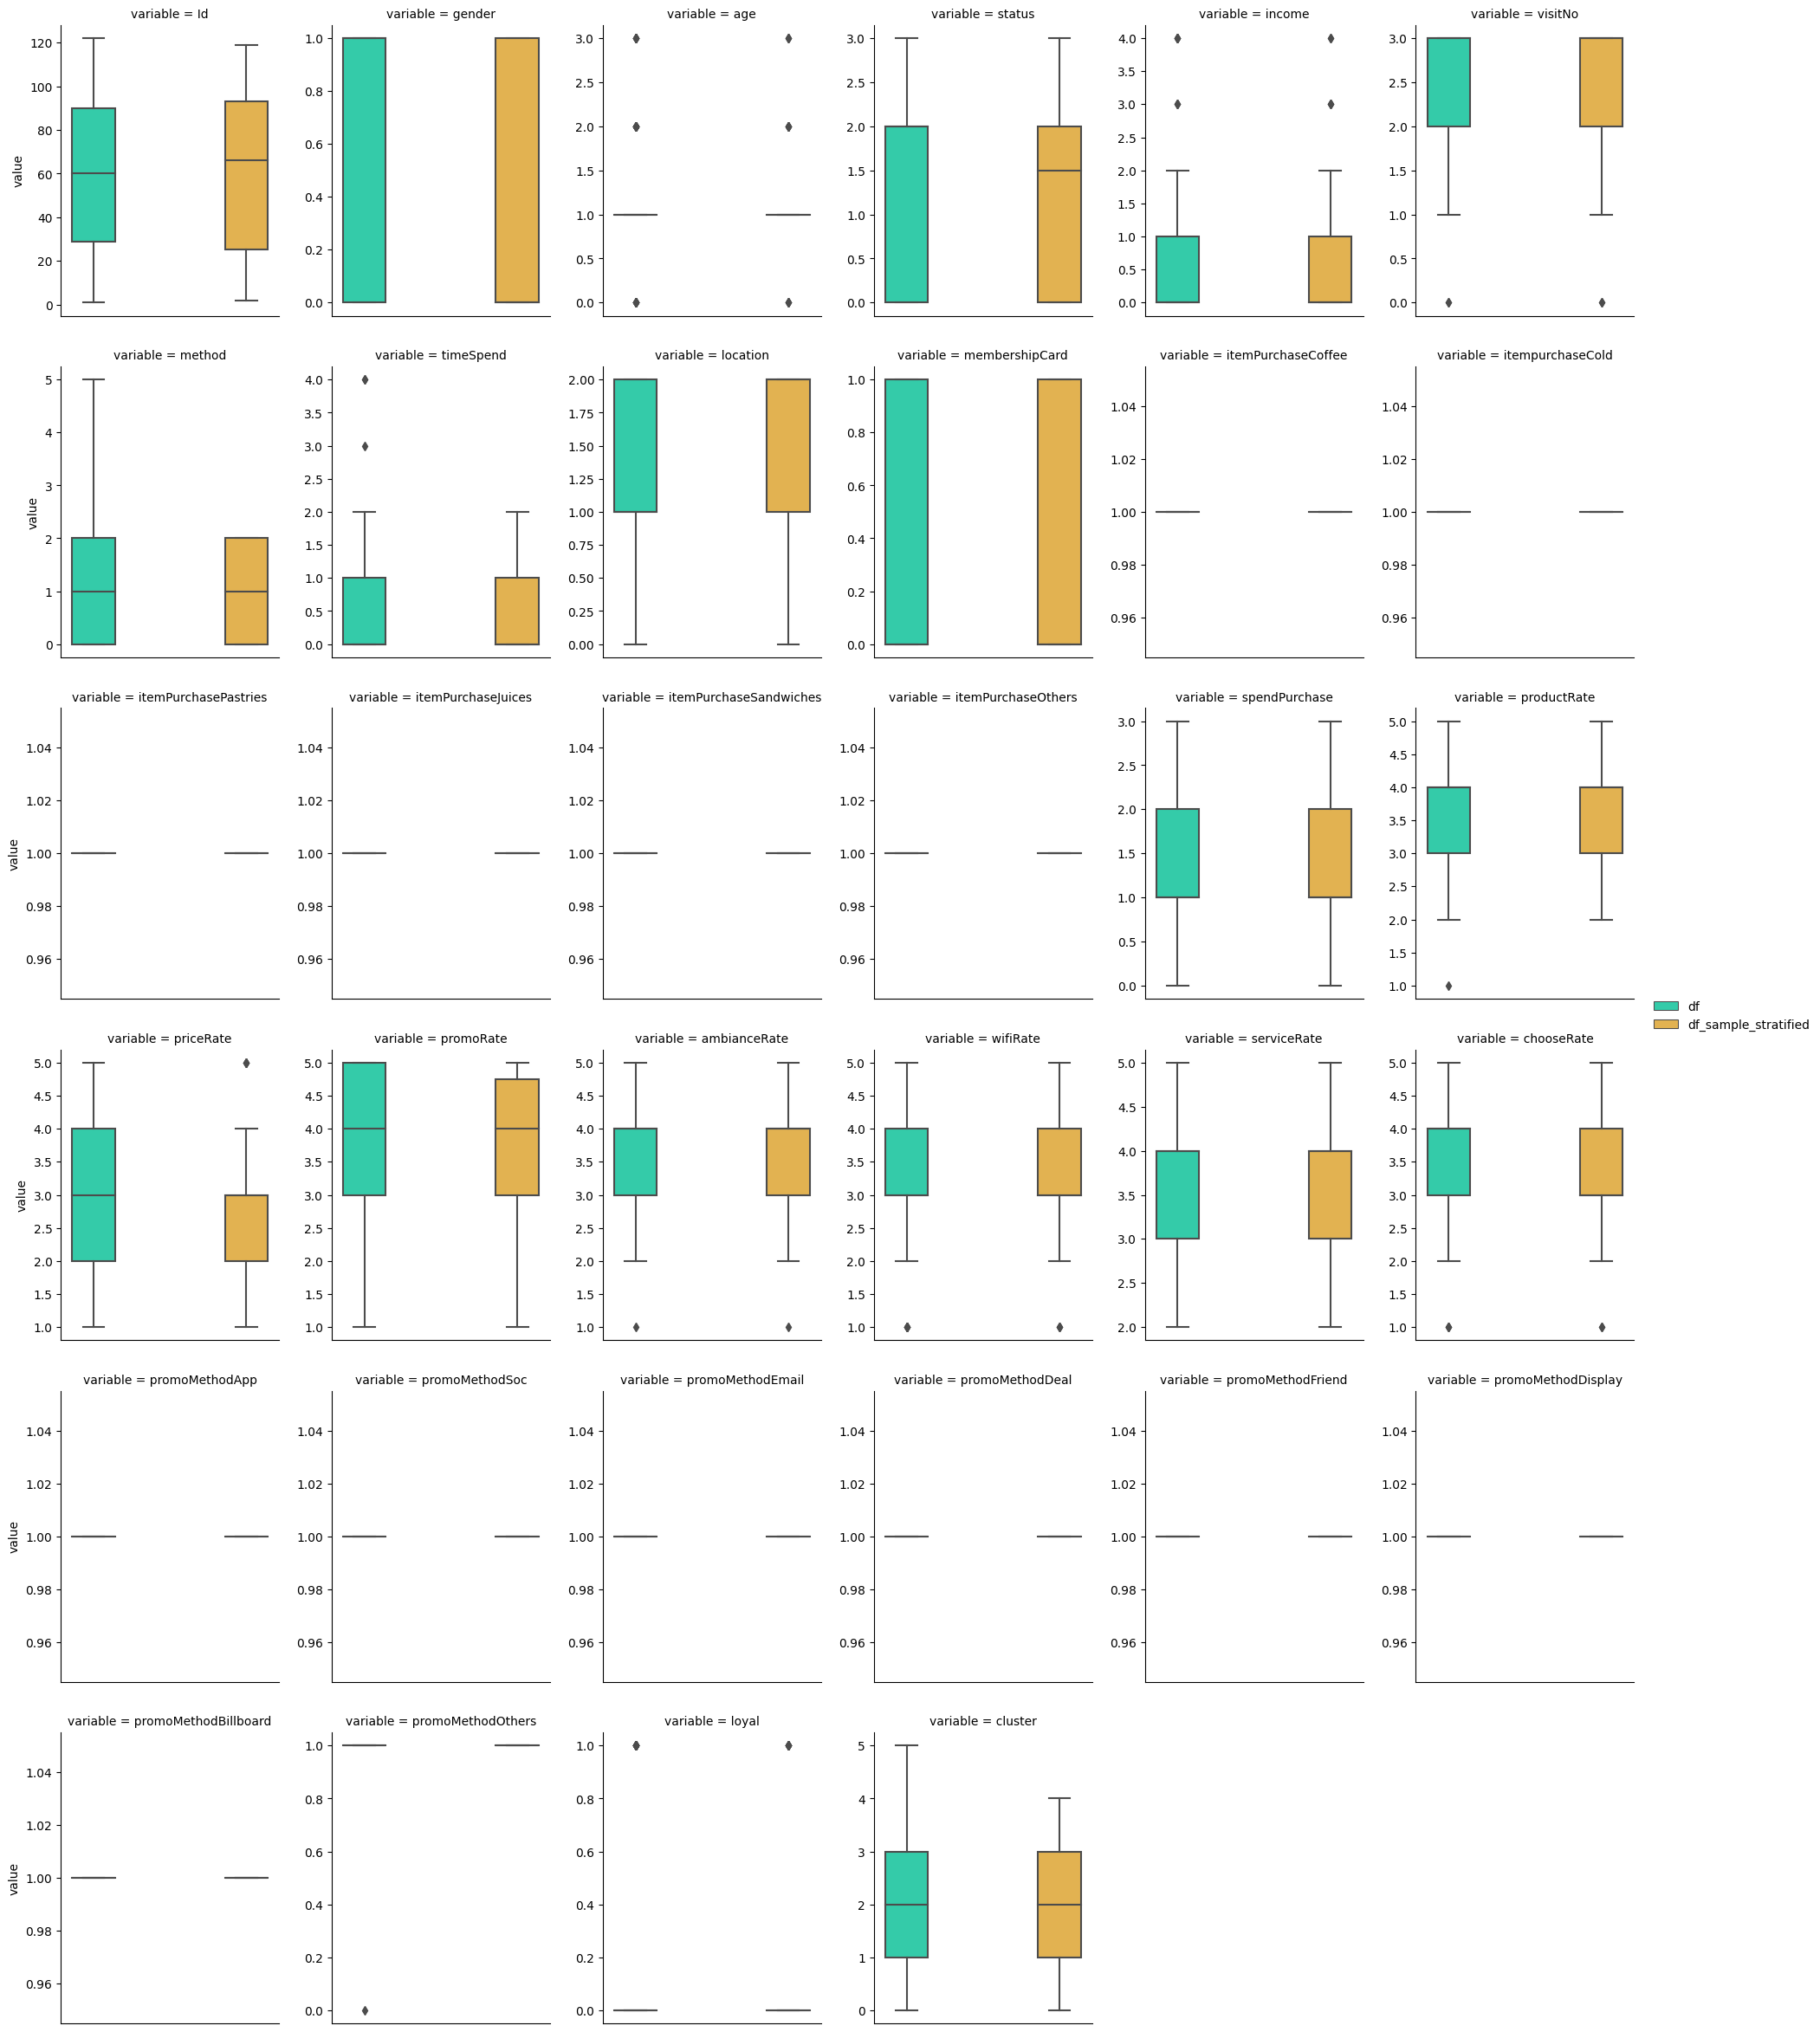

In [93]:
fig = plt.figure()
plt.figure(figsize=(100,50))
df2 = pd.concat({'df': df.melt(), 'df_sample_stratified': df_sample_stratified.melt()}, names=['source', 'old_index'])
df2 = df2.reset_index(level=0).reset_index(drop=True)

t = sns.catplot(data=df2, kind='box', col='variable', y='value', x='source', palette='turbo',hue='source', legend = 'brief', height=4, aspect=0.8, col_wrap=6, sharey=False)
t.set(xlabel='', xticks=[]) # remove x labels and ticks
t.add_legend()

Based on the statistics and box plot for the stratified sample and the original Starbucks data, we see some variations on the distributions of the status, priceRate, and promoRate. This could be due to a lower number of items chosen in each sample. Or it can suggest that splitting the group by who is loyal is more complicated and should be split by another attribute instead such as income or status.

As we saw, stratified sampling can provide key insights on how each attribute relates to each other and demonstrate representativeness of your sample when dealing with diverse populations or when you want to conduct subgroup-specific analyses.

## Systematic Sampling


Systematic sampling is a method of data sampling where you select every nth item from a list or population after randomly selecting a starting point. This approach is particularly useful when dealing with a large dataset and where we can assume that the data is somewhat uniformly distributed throughout the population.

Systematic sampling may not be the best choice if there are hidden patterns such as clustering or if the distribution is not uniform.

To perform systematic sampling, follow these steps:
1. Determine the Sample Size
2. Calculate the Sampling Interval
3. Select a Random Starting Point
4. Sample Selection
5. Data Collection

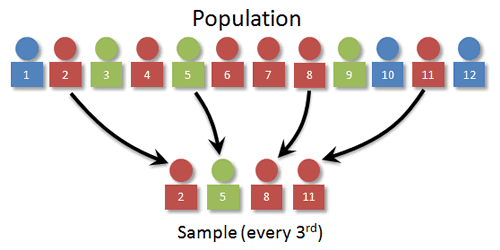

Let's revisit the Starbucks dataset.

In [61]:
display(df.describe())

,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,...,chooseRate,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,...,113.000000,113.0,113.0,113.0,113.0,113.0,113.0,113.0,113.000000,113.000000
mean,60.150442,0.522124,1.185841,1.221239,0.761062,2.557522,1.070796,0.610619,1.274336,0.469027,...,3.539823,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.991150,0.203540
std,35.566392,0.501735,0.675445,0.932877,1.087874,0.718854,0.979402,0.849723,0.804538,0.501263,...,1.026744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.094072,0.404424
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000
25%,29.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,3.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000
50%,60.000000,1.000000,1.000000,2.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,...,4.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000
75%,90.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,...,4.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000
max,122.000000,1.000000,3.000000,3.000000,4.000000,3.000000,5.000000,4.000000,2.000000,1.000000,...,5.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000


In a function, let's take the number of records in the dataset and divide it by the sample size we want to generate to create a selection range of the elements of our sample. The selection process must start randomly where the first element must be selected at a random position in the first range. Then we obtain sample indexes systematically based on the interval calculated.

Parameters:
* sample_size: number of elements to choose from the dataset
* state: whether the elements should change everytime the function is executed

In [62]:
# function for extracting systematic samples based on sample size and state

def sample_systematic(dataframe, sample_size, state = None):
    length = len(df)
    interval = length // sample_size
    rd.seed(state)
    first = rd.randint(0, interval)
    indexes = np.arange(first, length, step = interval)
    return dataframe.iloc[indexes]

Implementing our function, we will now choose a sample size of 55 and view the statistics of the resulting sample set.

In [123]:
# using the function
df_sample_systematic = sample_systematic(df, 55)
display(df_sample_systematic.describe())

79


,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,...,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal,cluster
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,...,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.000000,57.000000,57.000000
mean,60.157895,0.508772,1.105263,1.105263,0.736842,2.508772,1.157895,0.543860,1.245614,0.508772,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.982456,0.228070,2.105263
std,36.017253,0.504367,0.673058,0.938924,1.142152,0.782003,0.861673,0.927173,0.808011,0.504367,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.132453,0.423318,1.508123
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000
25%,29.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,1.000000
50%,60.000000,1.000000,1.000000,1.000000,0.000000,3.000000,1.000000,0.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,2.000000
75%,90.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,3.000000
max,122.000000,1.000000,3.000000,3.000000,4.000000,3.000000,2.000000,4.000000,2.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,5.000000


<Figure size 640x480 with 0 Axes>

<Figure size 10000x5000 with 0 Axes>

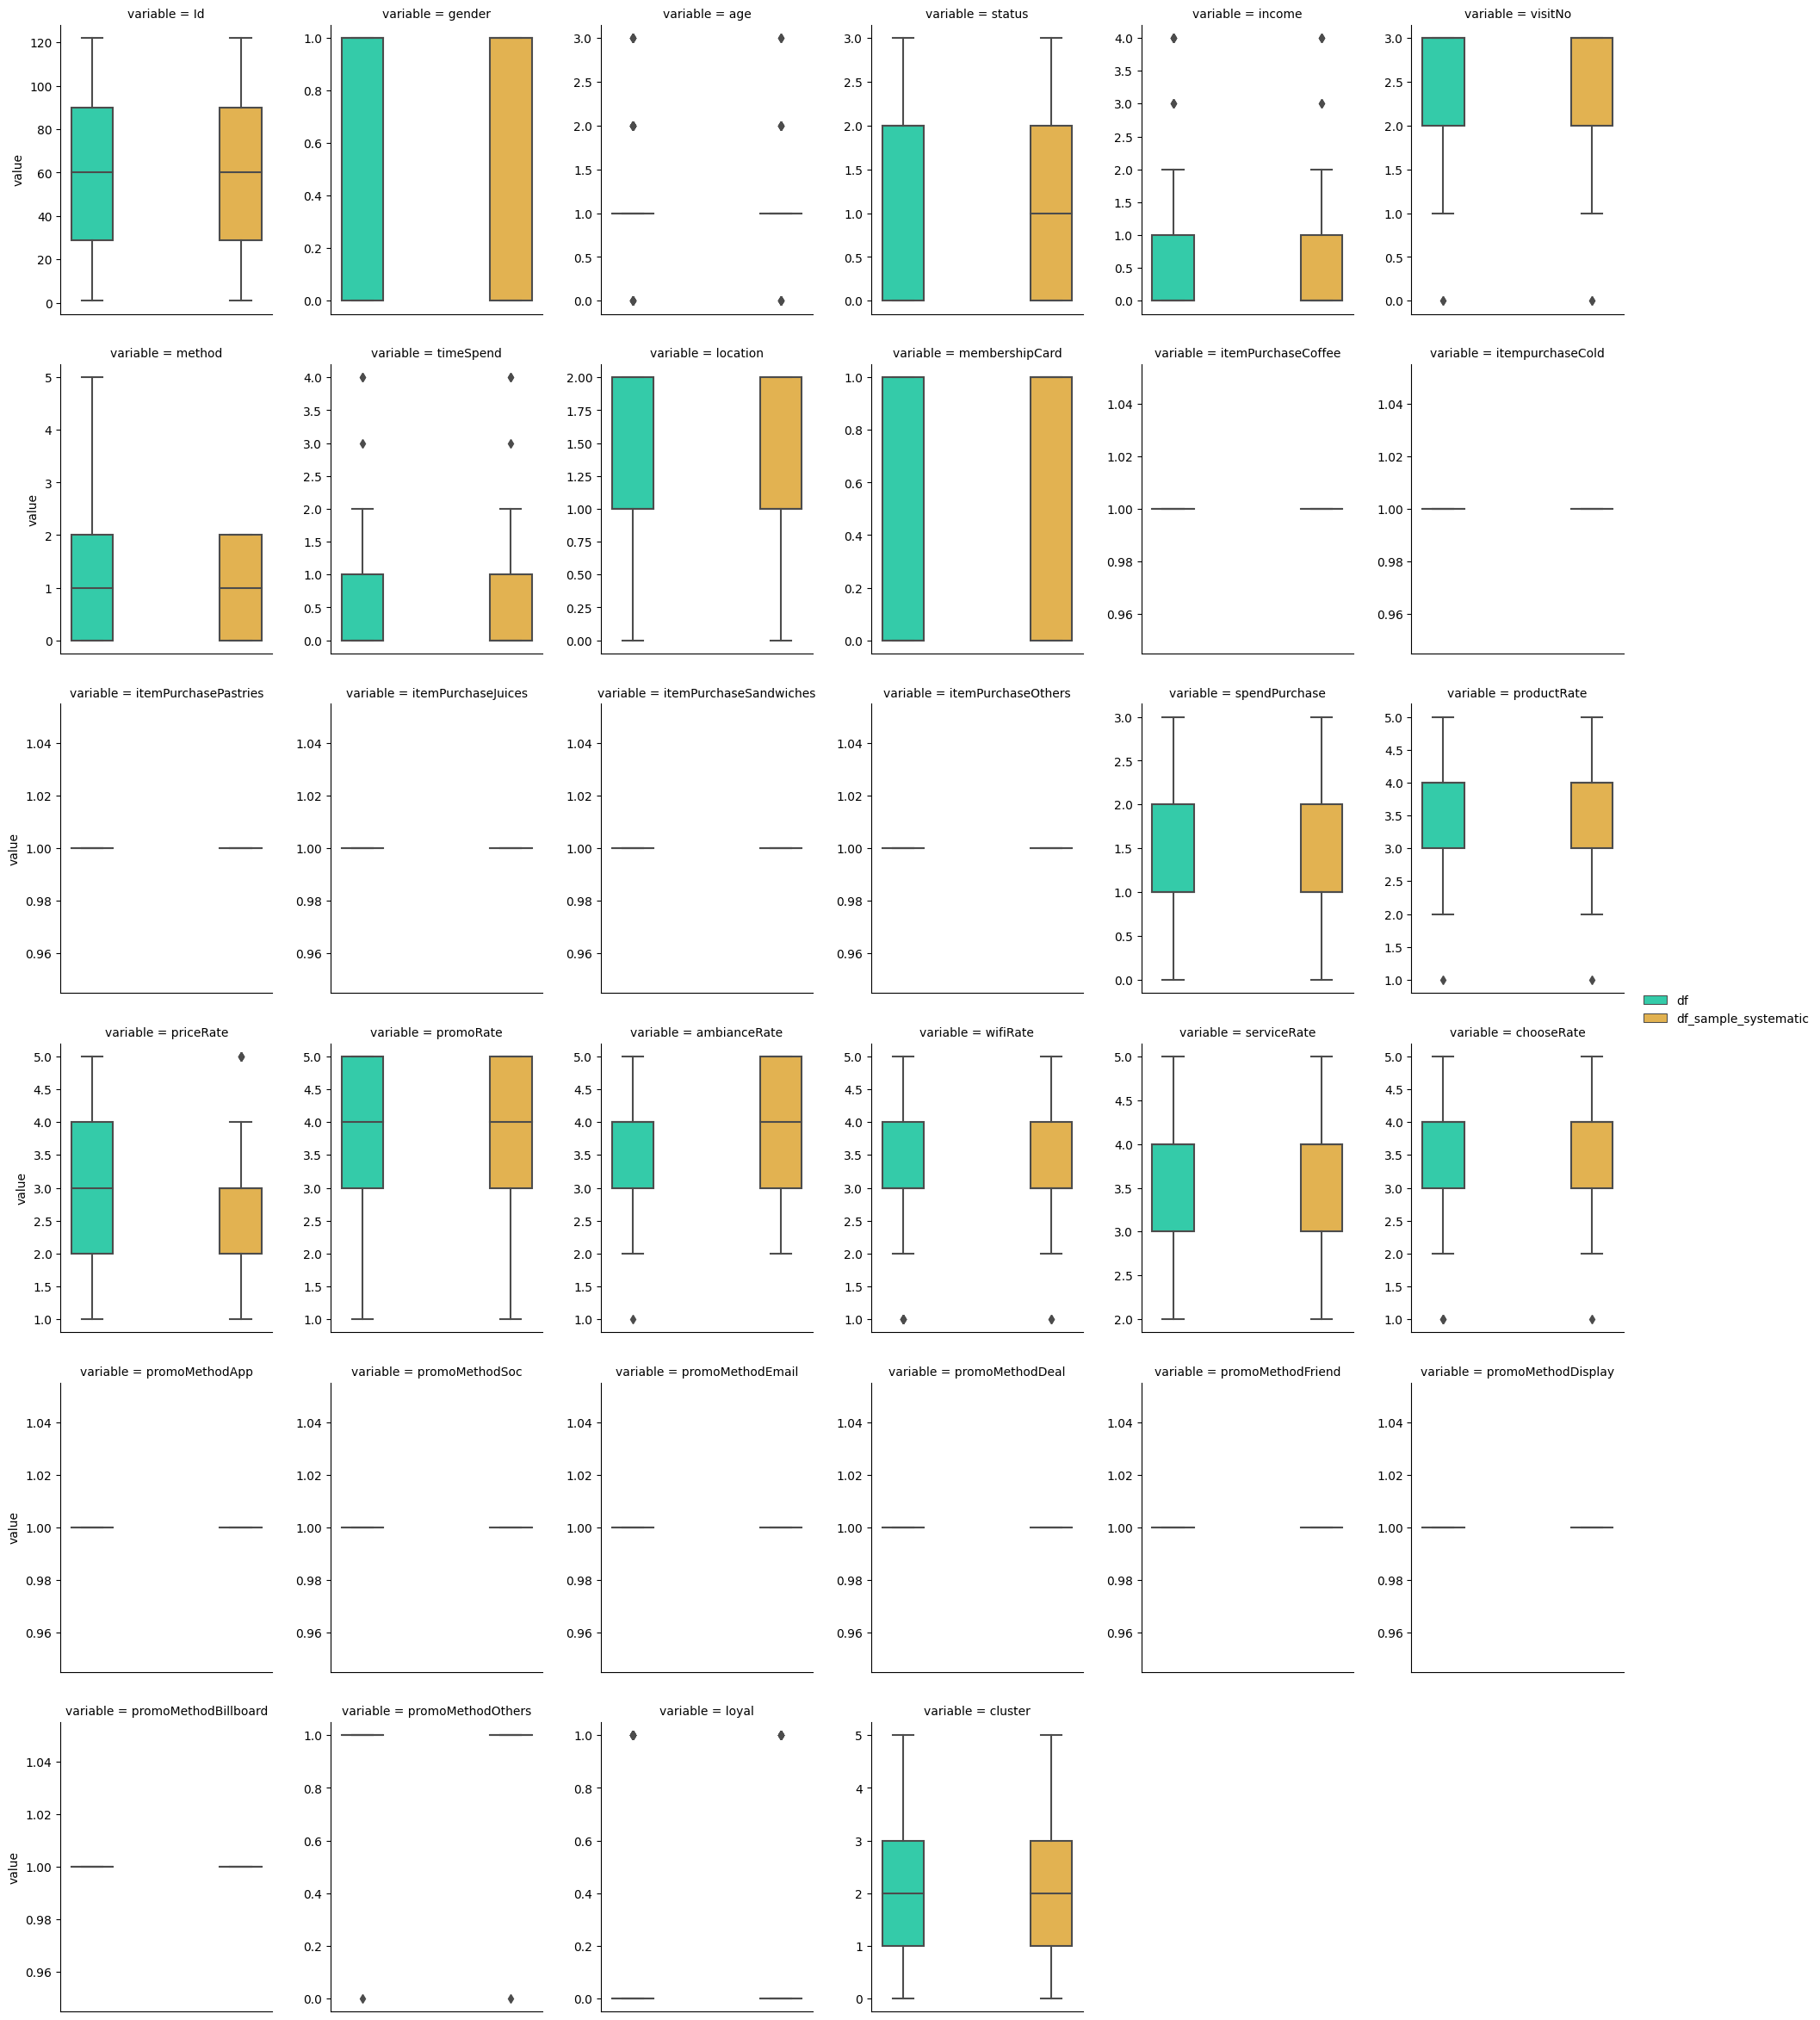

In [125]:
fig = plt.figure()
plt.figure(figsize=(100,50))
df2 = pd.concat({'df': df.melt(), 'df_sample_systematic': df_sample_systematic.melt()}, names=['source', 'old_index'])
df2 = df2.reset_index(level=0).reset_index(drop=True)

t = sns.catplot(data=df2, kind='box', col='variable', y='value', x='source', palette='turbo',hue='source', legend = 'brief', height=4, aspect=0.8, col_wrap=6, sharey=False)
t.set(xlabel='', xticks=[]) # remove x labels and ticks
t.add_legend()

Based on the statistics and box plot for the systematic sample and the original Starbucks data, we see that there is very little difference between the ranges of each attribute except for the priceRate and ambianceRate. This could be caused by systematic sampling error resulting in the mean and standard deviation for the sample's loyal attribute to be higher than the original dataset's loyal attribute.

In summary, systematic sampling is a valuable method when you need to efficiently select a representative sample from a large dataset, and you can assume some level of uniform distribution. However, it's important to be cautious of hidden patterns or biases that may arise in specific situations, and to carefully select a random starting point to maintain randomness. If in doubt, consulting with a statistician or expert in sampling methods can help you make an informed choice.

## Cluster Sampling


Cluster sampling is a sampling technique used in situations where the population is naturally grouped into clusters or subgroups, and it may be impractical or too costly to sample from the entire population. Instead of selecting individual elements from the population, cluster sampling involves randomly selecting entire clusters and then sampling within those clusters.

When the population naturally forms clusters, either geographically or by some other criterion, it makes sense to use cluster sampling. In clinical trials or experiments, cluster sampling may be used if the intervention or treatment is administered at the cluster level (e.g., schools, communities, hospitals). In some cases, cluster sampling can provide increased precision compared to simple random sampling, especially if the variation within clusters is smaller than the variation between clusters.

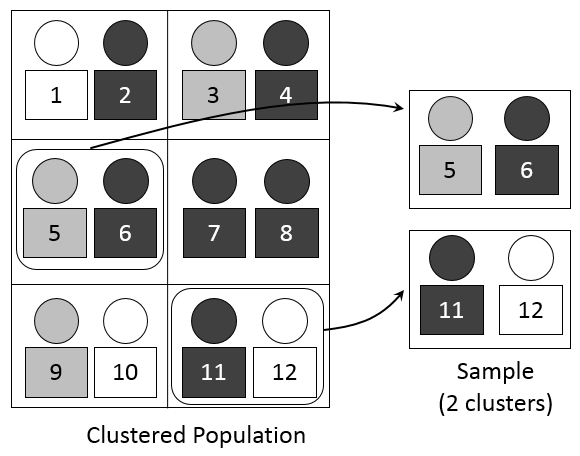

Follow the steps to perform cluster sampling:
1. Create a list or map of all the clusters in the population.
2. Decide how many clusters you want to include in your sample
3. Use a random sampling technique (e.g., random number generator) to select the required number of clusters from the sampling frame
4. Once clusters are selected, include all elements (individuals, households, etc.) within each chosen cluster in your sample
5. Collect data from the elements within the selected clusters

Let's revisit the Starbucks dataset.

In [96]:
display(df.describe())

,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,...,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal,cluster
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,...,113.0,113.0,113.0,113.0,113.0,113.0,113.0,113.000000,113.000000,113.000000
mean,60.150442,0.522124,1.185841,1.221239,0.761062,2.557522,1.070796,0.610619,1.274336,0.469027,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.991150,0.203540,2.079646
std,35.566392,0.501735,0.675445,0.932877,1.087874,0.718854,0.979402,0.849723,0.804538,0.501263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.094072,0.404424,1.482888
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000
25%,29.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,1.000000
50%,60.000000,1.000000,1.000000,2.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,2.000000
75%,90.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,3.000000
max,122.000000,1.000000,3.000000,3.000000,4.000000,3.000000,5.000000,4.000000,2.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,5.000000


We can start by sorting the dataset by the income. By sorting the dataset first and then assigning the cluster we are able to group based on nearby incomes.

In [97]:
# Sorting by column 'income'
df.sort_values(by=['income'])

,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,...,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal,cluster
0,1,1,1,0,0,3,0,1,0,0,...,1,1,1,1,1,1,1,1,0,0
68,73,1,1,2,0,2,2,0,2,0,...,1,1,1,1,1,1,1,1,0,3
66,71,1,1,2,0,3,2,0,0,1,...,1,1,1,1,1,1,1,1,0,3
64,69,1,1,2,0,3,0,0,2,1,...,1,1,1,1,1,1,1,1,1,2
62,66,1,1,0,0,3,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,26,0,2,2,4,2,0,1,1,0,...,1,1,1,1,1,1,1,1,0,1
26,27,0,2,2,4,3,1,0,1,1,...,1,1,1,1,1,1,1,0,1,1
28,29,0,3,1,4,1,1,0,1,0,...,1,1,1,1,1,1,1,1,0,1
80,86,0,2,1,4,2,0,3,2,0,...,1,1,1,1,1,1,1,1,0,3


We can create a function to perform cluster sampling outlining the steps above.
First, we obtain the number of elements in each cluster group and create a list that assigns the group id to the element. Then, we append the group id to the original dataset and randomly choose a cluster to perform analysis on.

Parameters:
* clusters: number of clusters to make from the dataset
* state: whether the elements should change everytime the function is executed

In [98]:
# function for extracting systematic samples with useful parameters

def sample_cluster(dataframe, clusters, state = None):
    # define variables
    length = len(dataframe)
    element_max = length / clusters
    print(f'  - elements by cluster: {element_max}')

    cluster_list = []
    cluster_id = 0
    element_count = 0

    # define clusters
    for _ in df.iterrows():
        cluster_list.append(cluster_id)
        element_count += 1
        if element_count > (element_max - 1):
            element_count = 0
            cluster_id += 1
    # add cluster number to the table
    dataframe['cluster'] = cluster_list
    print(' - cluster list')
    print(dataframe['cluster'].value_counts())
    print('')
    rd.seed(state)
    # choose a cluster randomly
    cluster_selected = rd.randint(0, clusters - 1)
    print('cluster selected:',cluster_selected)
    dataframe_clustered_selected = dataframe[dataframe['cluster'] == cluster_selected]
    print('cluster size:',dataframe_clustered_selected.shape[0],'\n')
    #dataframe = dataframe.drop(['cluster'], axis=1)
    return dataframe_clustered_selected

With our function defined, we can perform clustered sampling with 200 clusters.

In [99]:
# using the function
df_sample_cluster = sample_cluster(df, 5)

display(df_sample_cluster.describe())

  - elements by cluster: 22.6
 - cluster list
0    22
1    22
2    22
3    22
4    22
5     3
Name: cluster, dtype: int64

cluster selected: 1
cluster size: 22 



,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,...,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal,cluster
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.000000,22.000000,22.0
mean,33.727273,0.545455,1.363636,1.454545,1.318182,2.454545,1.090909,0.727273,1.045455,0.454545,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.954545,0.181818,1.0
std,6.846492,0.509647,0.726731,0.800433,1.393398,0.738549,0.921132,1.031957,0.843873,0.509647,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.213201,0.394771,0.0
min,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,1.0
25%,28.250000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,1.0
50%,33.500000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,1.0
75%,38.750000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,1.0
max,46.000000,1.000000,3.000000,2.000000,4.000000,3.000000,2.000000,4.000000,2.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0


<Figure size 640x480 with 0 Axes>

<Figure size 10000x5000 with 0 Axes>

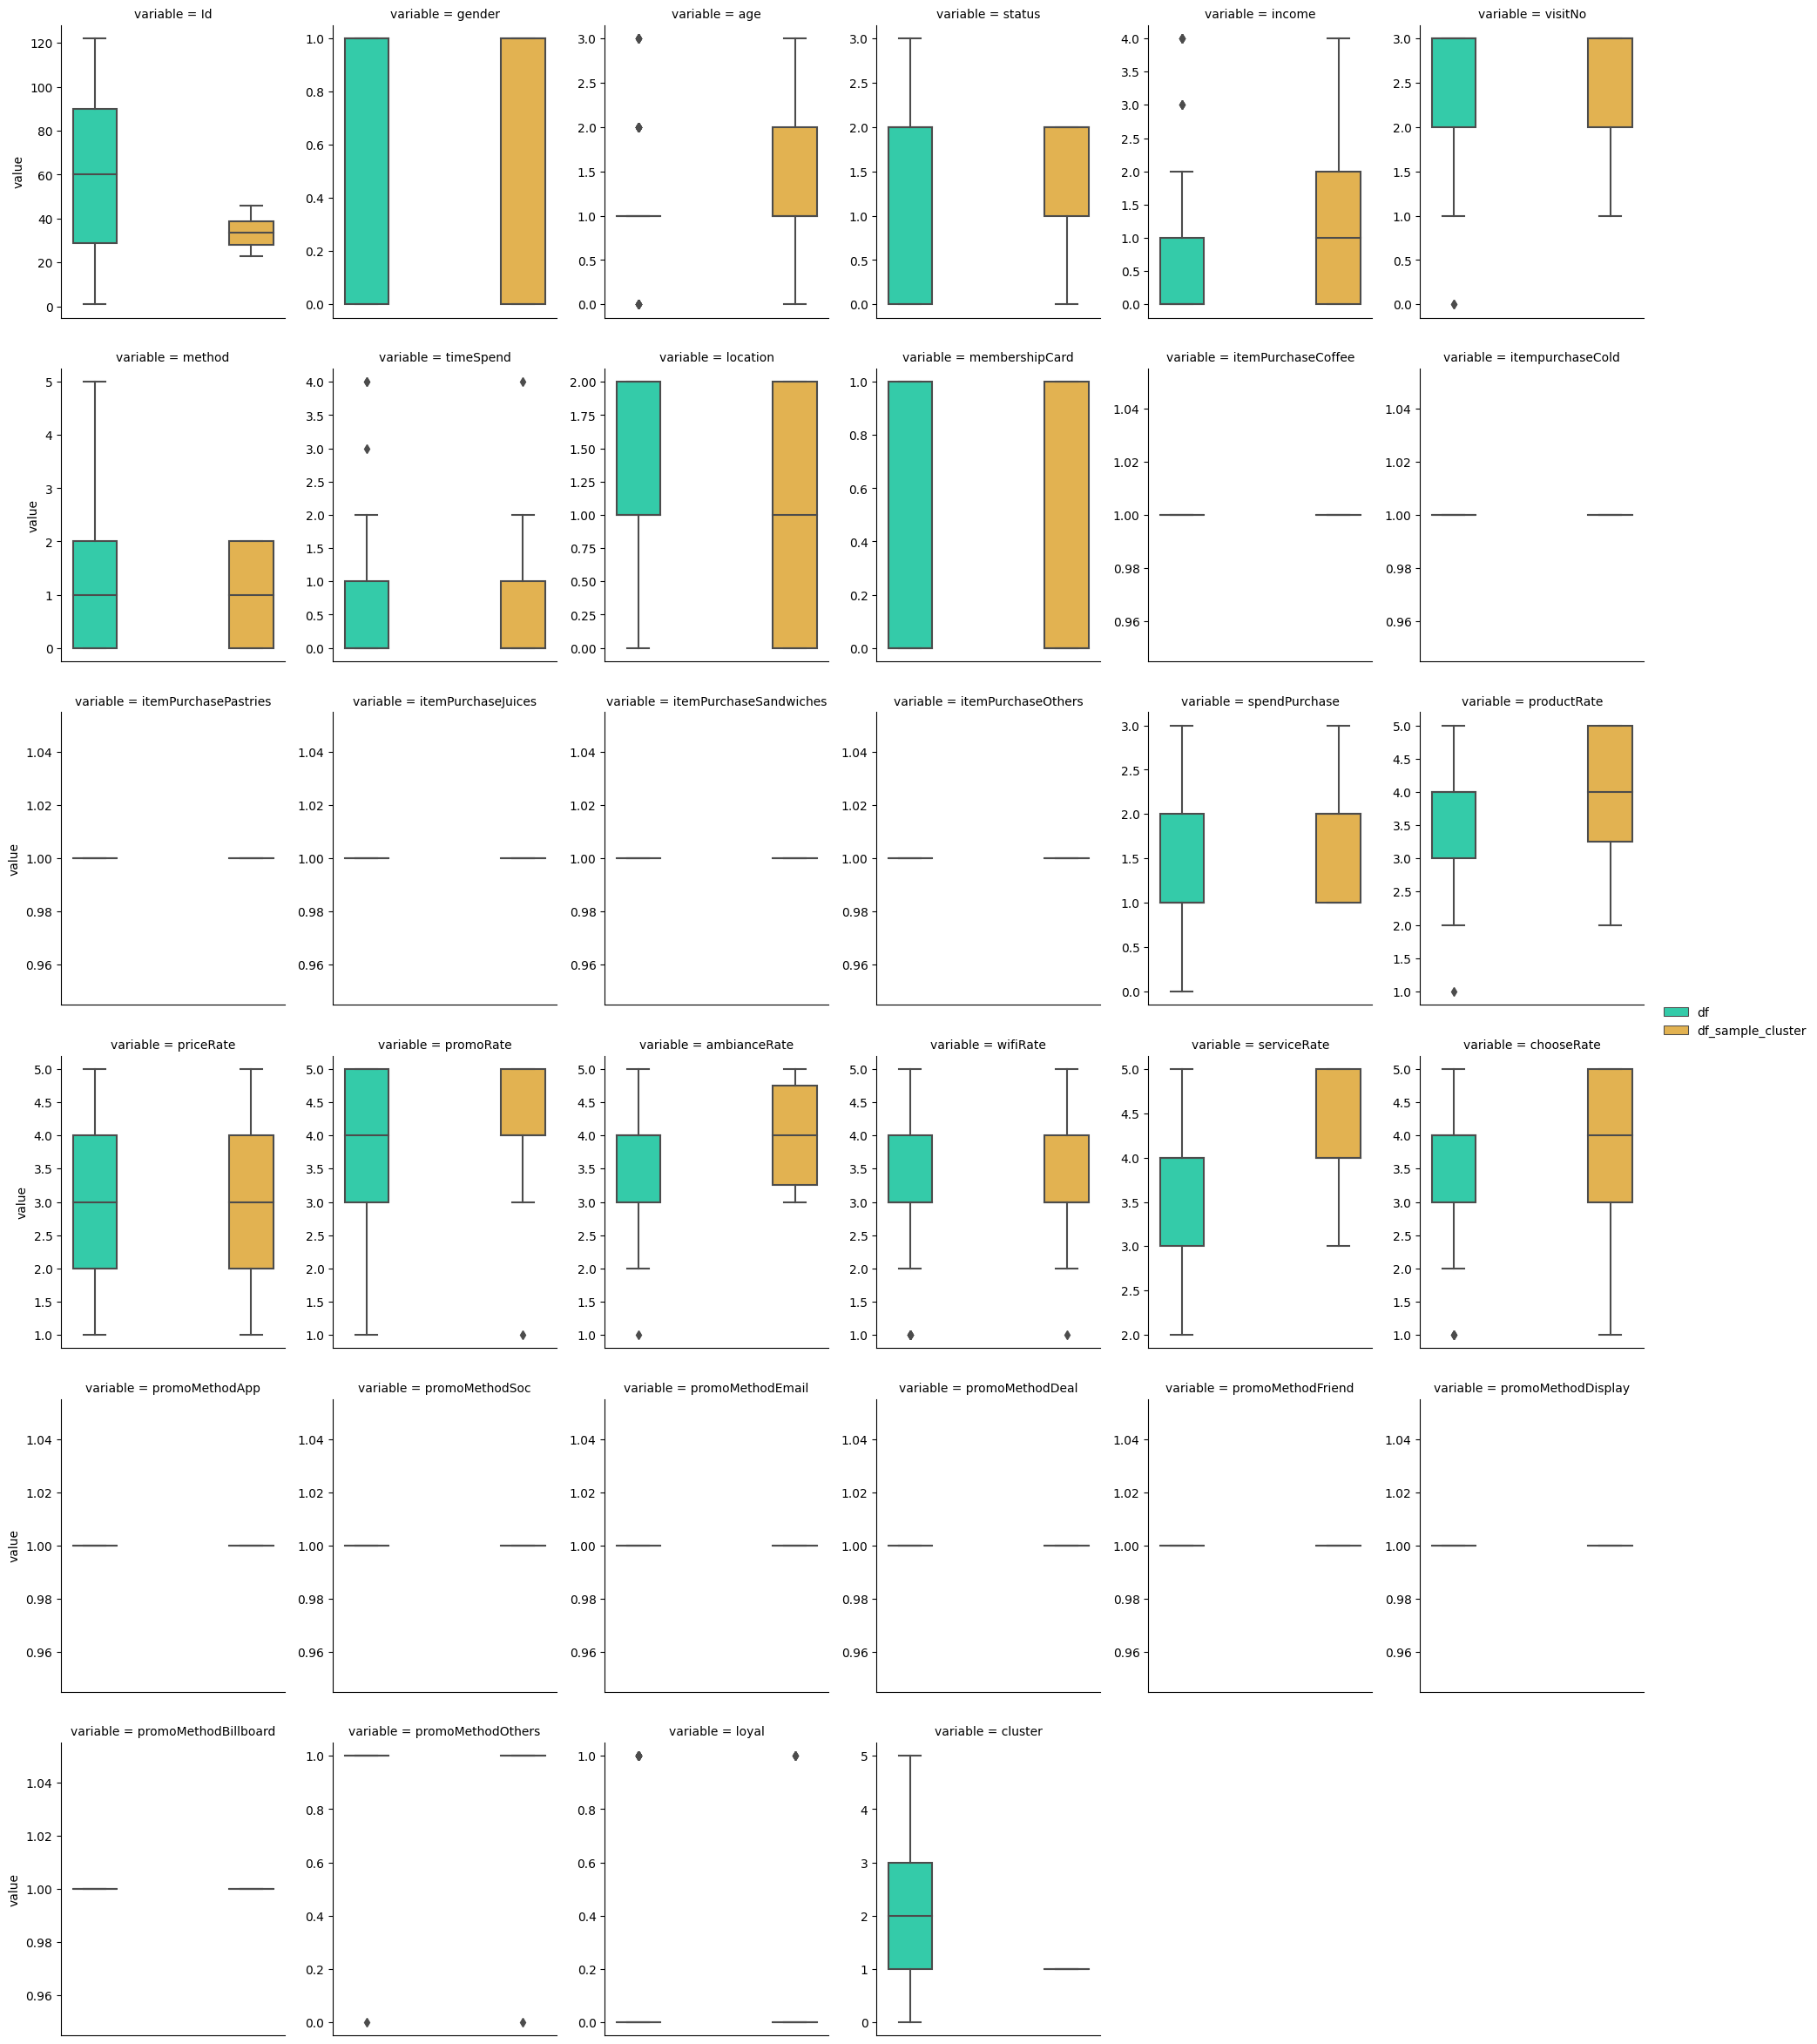

In [100]:
fig = plt.figure()
plt.figure(figsize=(100,50))
df2 = pd.concat({'df': df.melt(), 'df_sample_cluster': df_sample_cluster.melt()}, names=['source', 'old_index'])
df2 = df2.reset_index(level=0).reset_index(drop=True)

t = sns.catplot(data=df2, kind='box', col='variable', y='value', x='source', palette='turbo',hue='source', legend = 'brief', height=4, aspect=0.8, col_wrap=6, sharey=False)
t.set(xlabel='', xticks=[]) # remove x labels and ticks
t.add_legend()

In this example, we see that the cluster sample's income range is a lot smaller than the complete dataset's income range. This would make sense as the cluster groups are not assigned randomly. This also causes the varying ranges across the attributes showing us that income has a significant impact on the other attributes. Focusing on the loyal column, we see that the clustered dataset's average and standard deviation is slight lower but similar to the original dataset. This makes sense as the current chosen cluster has a smaller income so they would be less likely to come often to Starbucks where it is known to be expensive.

Cluster sampling can be a cost-effective and practical approach in situations where individual-level sampling is challenging or resource-intensive. However, it's essential to carefully plan and execute the sampling process to ensure that the results are valid and representative of the entire population.

## Bootstrapping

Bootstrapping is a statistical resampling technique employed to estimate the sampling distribution of a statistic. This method involves repeatedly drawing samples from the observed data with replacement.
Bootstrapping can be useful when you need to gauge the uncertainty or variability tied to a particular statistic, such as mean, median, or regression coefficient, especially when dealing with limited dataset sizes.

Furthermore, bootstrapping finds utility in tasks like model validation and outlier detection. It proves especially advantageous in situations where conducting cross-validation poses challenges or becomes computationally intensive.

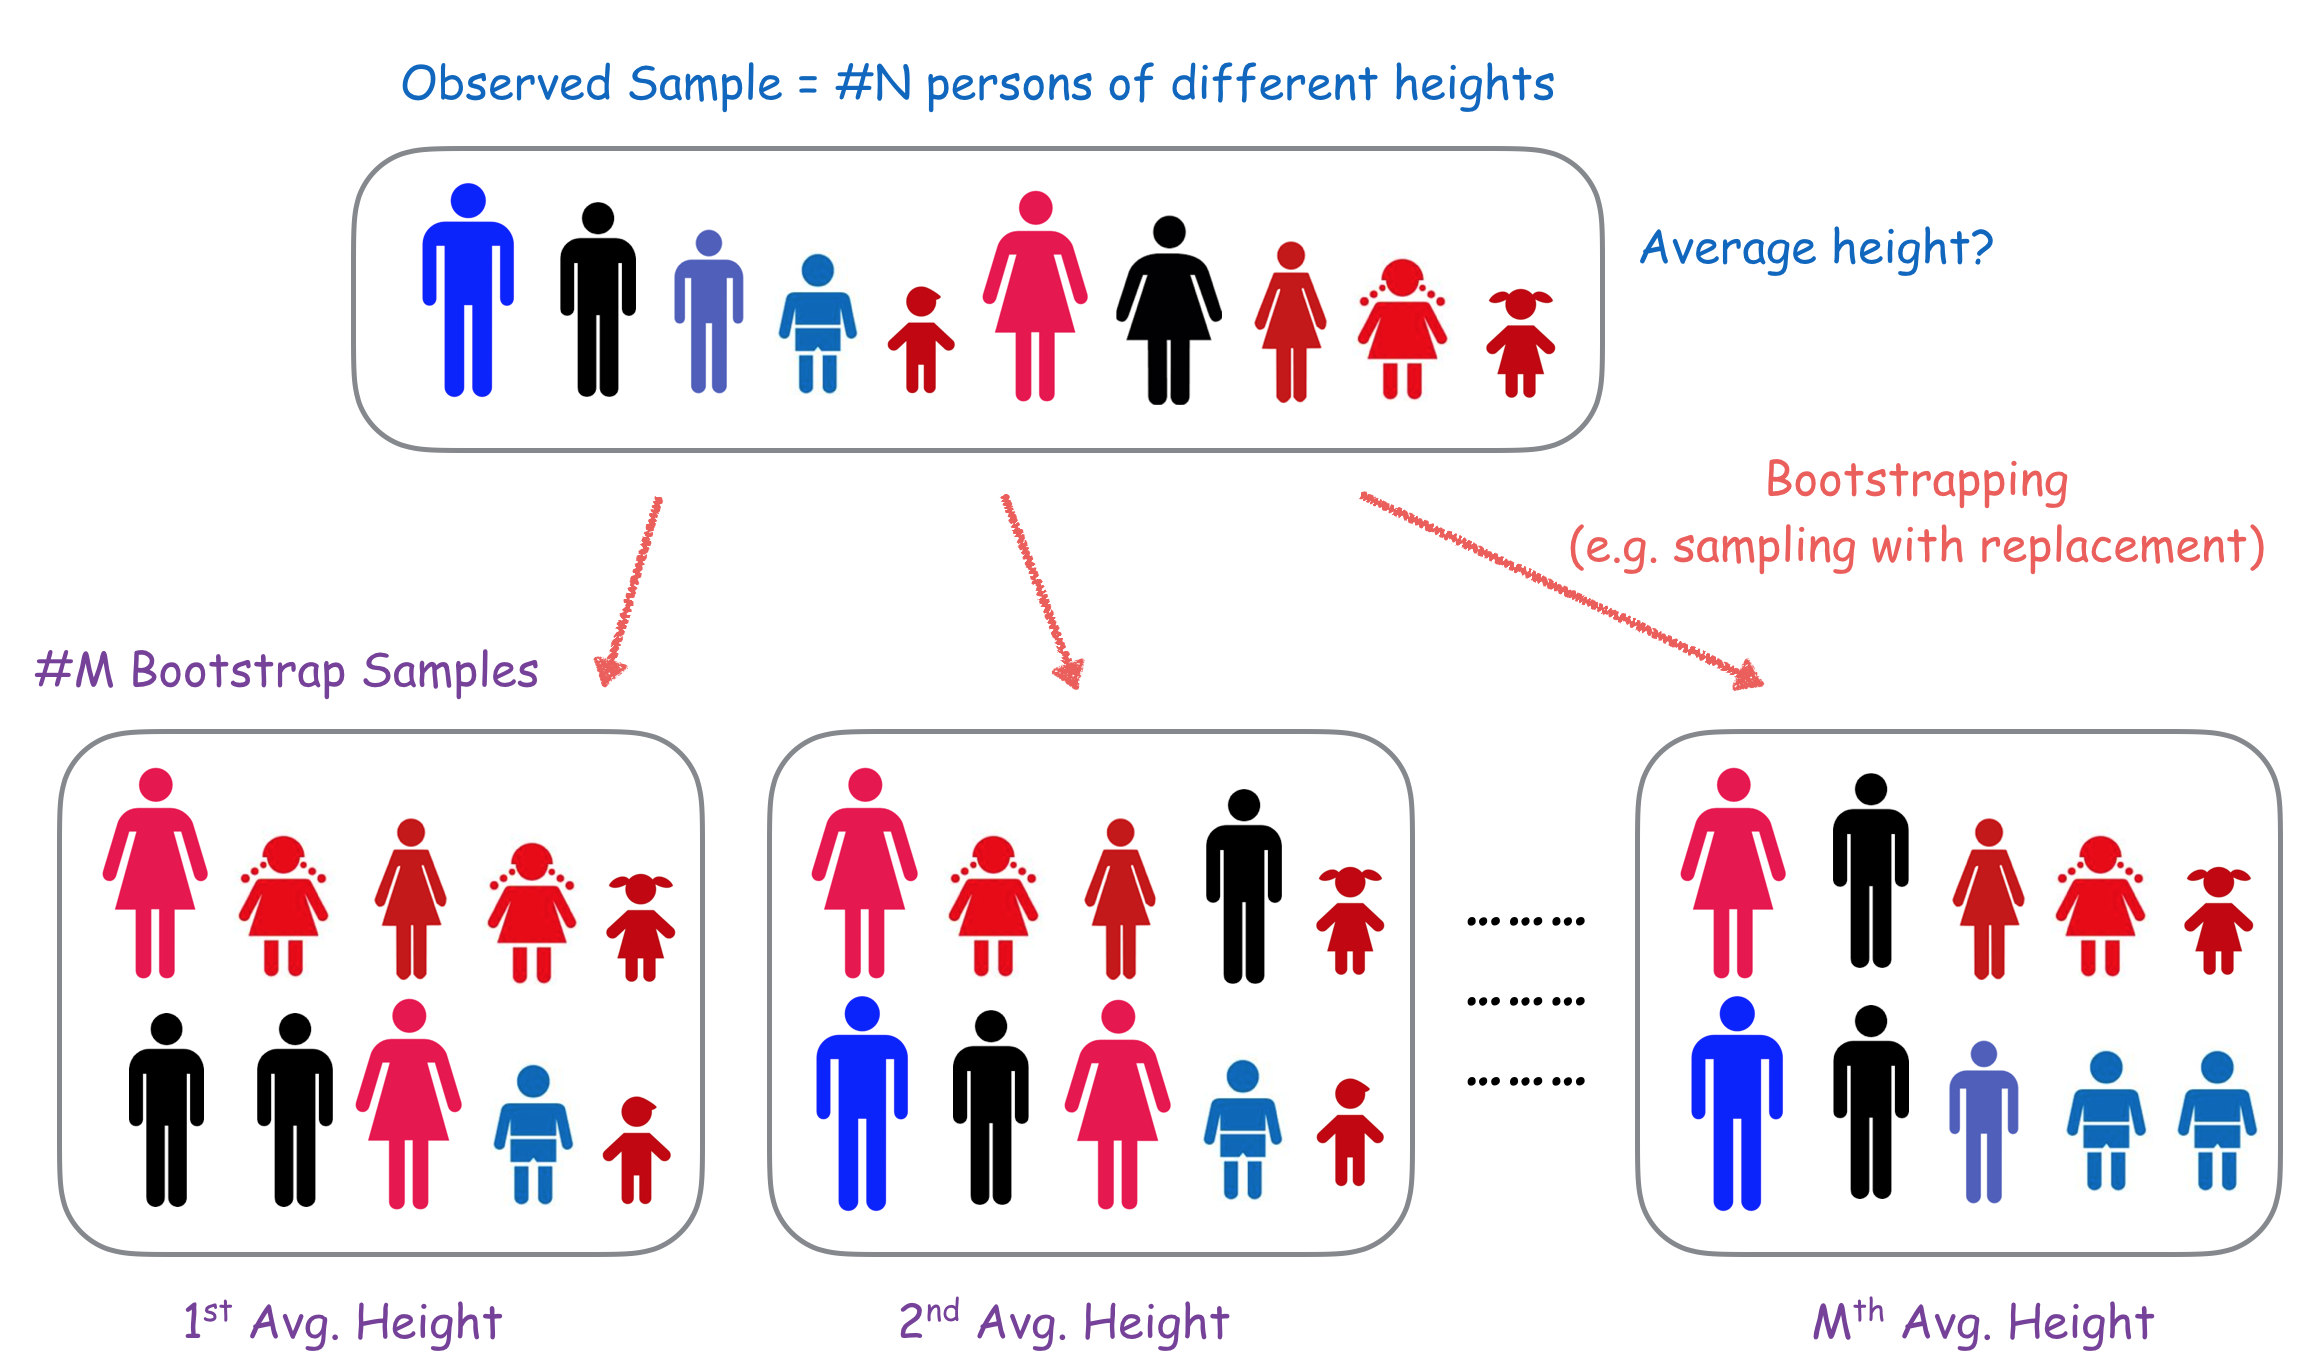

To perform boostrapping effectively, follow these steps:
1. Decide on the size of each bootstrap sample (n).
2. Randomly draw n data points from your original dataset, allowing for replacement
3. Repeat Step 2 to create multiple bootstrap samples

Let's revisit the Starbucks dataset one more time and remove the cluster column.

In [72]:
df = df.drop(['cluster'], axis=1)
display(df.describe())

,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,...,chooseRate,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,...,113.000000,113.0,113.0,113.0,113.0,113.0,113.0,113.0,113.000000,113.000000
mean,60.150442,0.522124,1.185841,1.221239,0.761062,2.557522,1.070796,0.610619,1.274336,0.469027,...,3.539823,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.991150,0.203540
std,35.566392,0.501735,0.675445,0.932877,1.087874,0.718854,0.979402,0.849723,0.804538,0.501263,...,1.026744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.094072,0.404424
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000
25%,29.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,3.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000
50%,60.000000,1.000000,1.000000,2.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,...,4.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000
75%,90.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,...,4.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000
max,122.000000,1.000000,3.000000,3.000000,4.000000,3.000000,5.000000,4.000000,2.000000,1.000000,...,5.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000


In [73]:
# Libraries for bootstrap
from sklearn.utils import resample

We will use the ```resample()``` function from the utils library to randomly select 70% of the values from the credit table. In this example, since we are creating multiple samples, want to control the results produced. We set the random_state to allow elements to change everytime the function is executed and pass 200 as a seed to generate a random number.

Parameters:
* n: the number of items in the sample
* replace: whether the elements of the table can be inserted into the sample more than once
* random_state: determines random number generation for shuffling the data. (default is None).


In [78]:
# first sample
df_boot1 = resample(df, replace=True, n_samples=round(len(df)*0.70), random_state=200)

In [79]:
# second sample
df_boot2 =  resample(df, replace=True, n_samples=round(len(df)*0.70), random_state=200)

In [80]:
# now let's compare
display(df_boot1.describe())
display(df_boot2.describe())

,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,...,chooseRate,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,...,79.000000,79.0,79.0,79.0,79.0,79.0,79.0,79.0,79.000000,79.000000
mean,58.012658,0.620253,1.151899,1.265823,0.759494,2.531646,1.025316,0.670886,1.329114,0.506329,...,3.468354,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.987342,0.253165
std,34.953630,0.488425,0.579315,0.956876,0.976850,0.730919,0.999675,0.943555,0.779900,0.503155,...,0.984957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112509,0.437603
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000
25%,27.500000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,3.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000
50%,60.000000,1.000000,1.000000,2.000000,0.000000,3.000000,1.000000,0.000000,2.000000,1.000000,...,3.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000
75%,84.500000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,1.000000,...,4.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.500000
max,121.000000,1.000000,3.000000,3.000000,4.000000,3.000000,5.000000,4.000000,2.000000,1.000000,...,5.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000


,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,...,chooseRate,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,...,79.000000,79.0,79.0,79.0,79.0,79.0,79.0,79.0,79.000000,79.000000
mean,58.012658,0.620253,1.151899,1.265823,0.759494,2.531646,1.025316,0.670886,1.329114,0.506329,...,3.468354,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.987342,0.253165
std,34.953630,0.488425,0.579315,0.956876,0.976850,0.730919,0.999675,0.943555,0.779900,0.503155,...,0.984957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112509,0.437603
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000
25%,27.500000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,3.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000
50%,60.000000,1.000000,1.000000,2.000000,0.000000,3.000000,1.000000,0.000000,2.000000,1.000000,...,3.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000
75%,84.500000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,1.000000,...,4.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.500000
max,121.000000,1.000000,3.000000,3.000000,4.000000,3.000000,5.000000,4.000000,2.000000,1.000000,...,5.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000


<Figure size 640x480 with 0 Axes>

<Figure size 10000x5000 with 0 Axes>

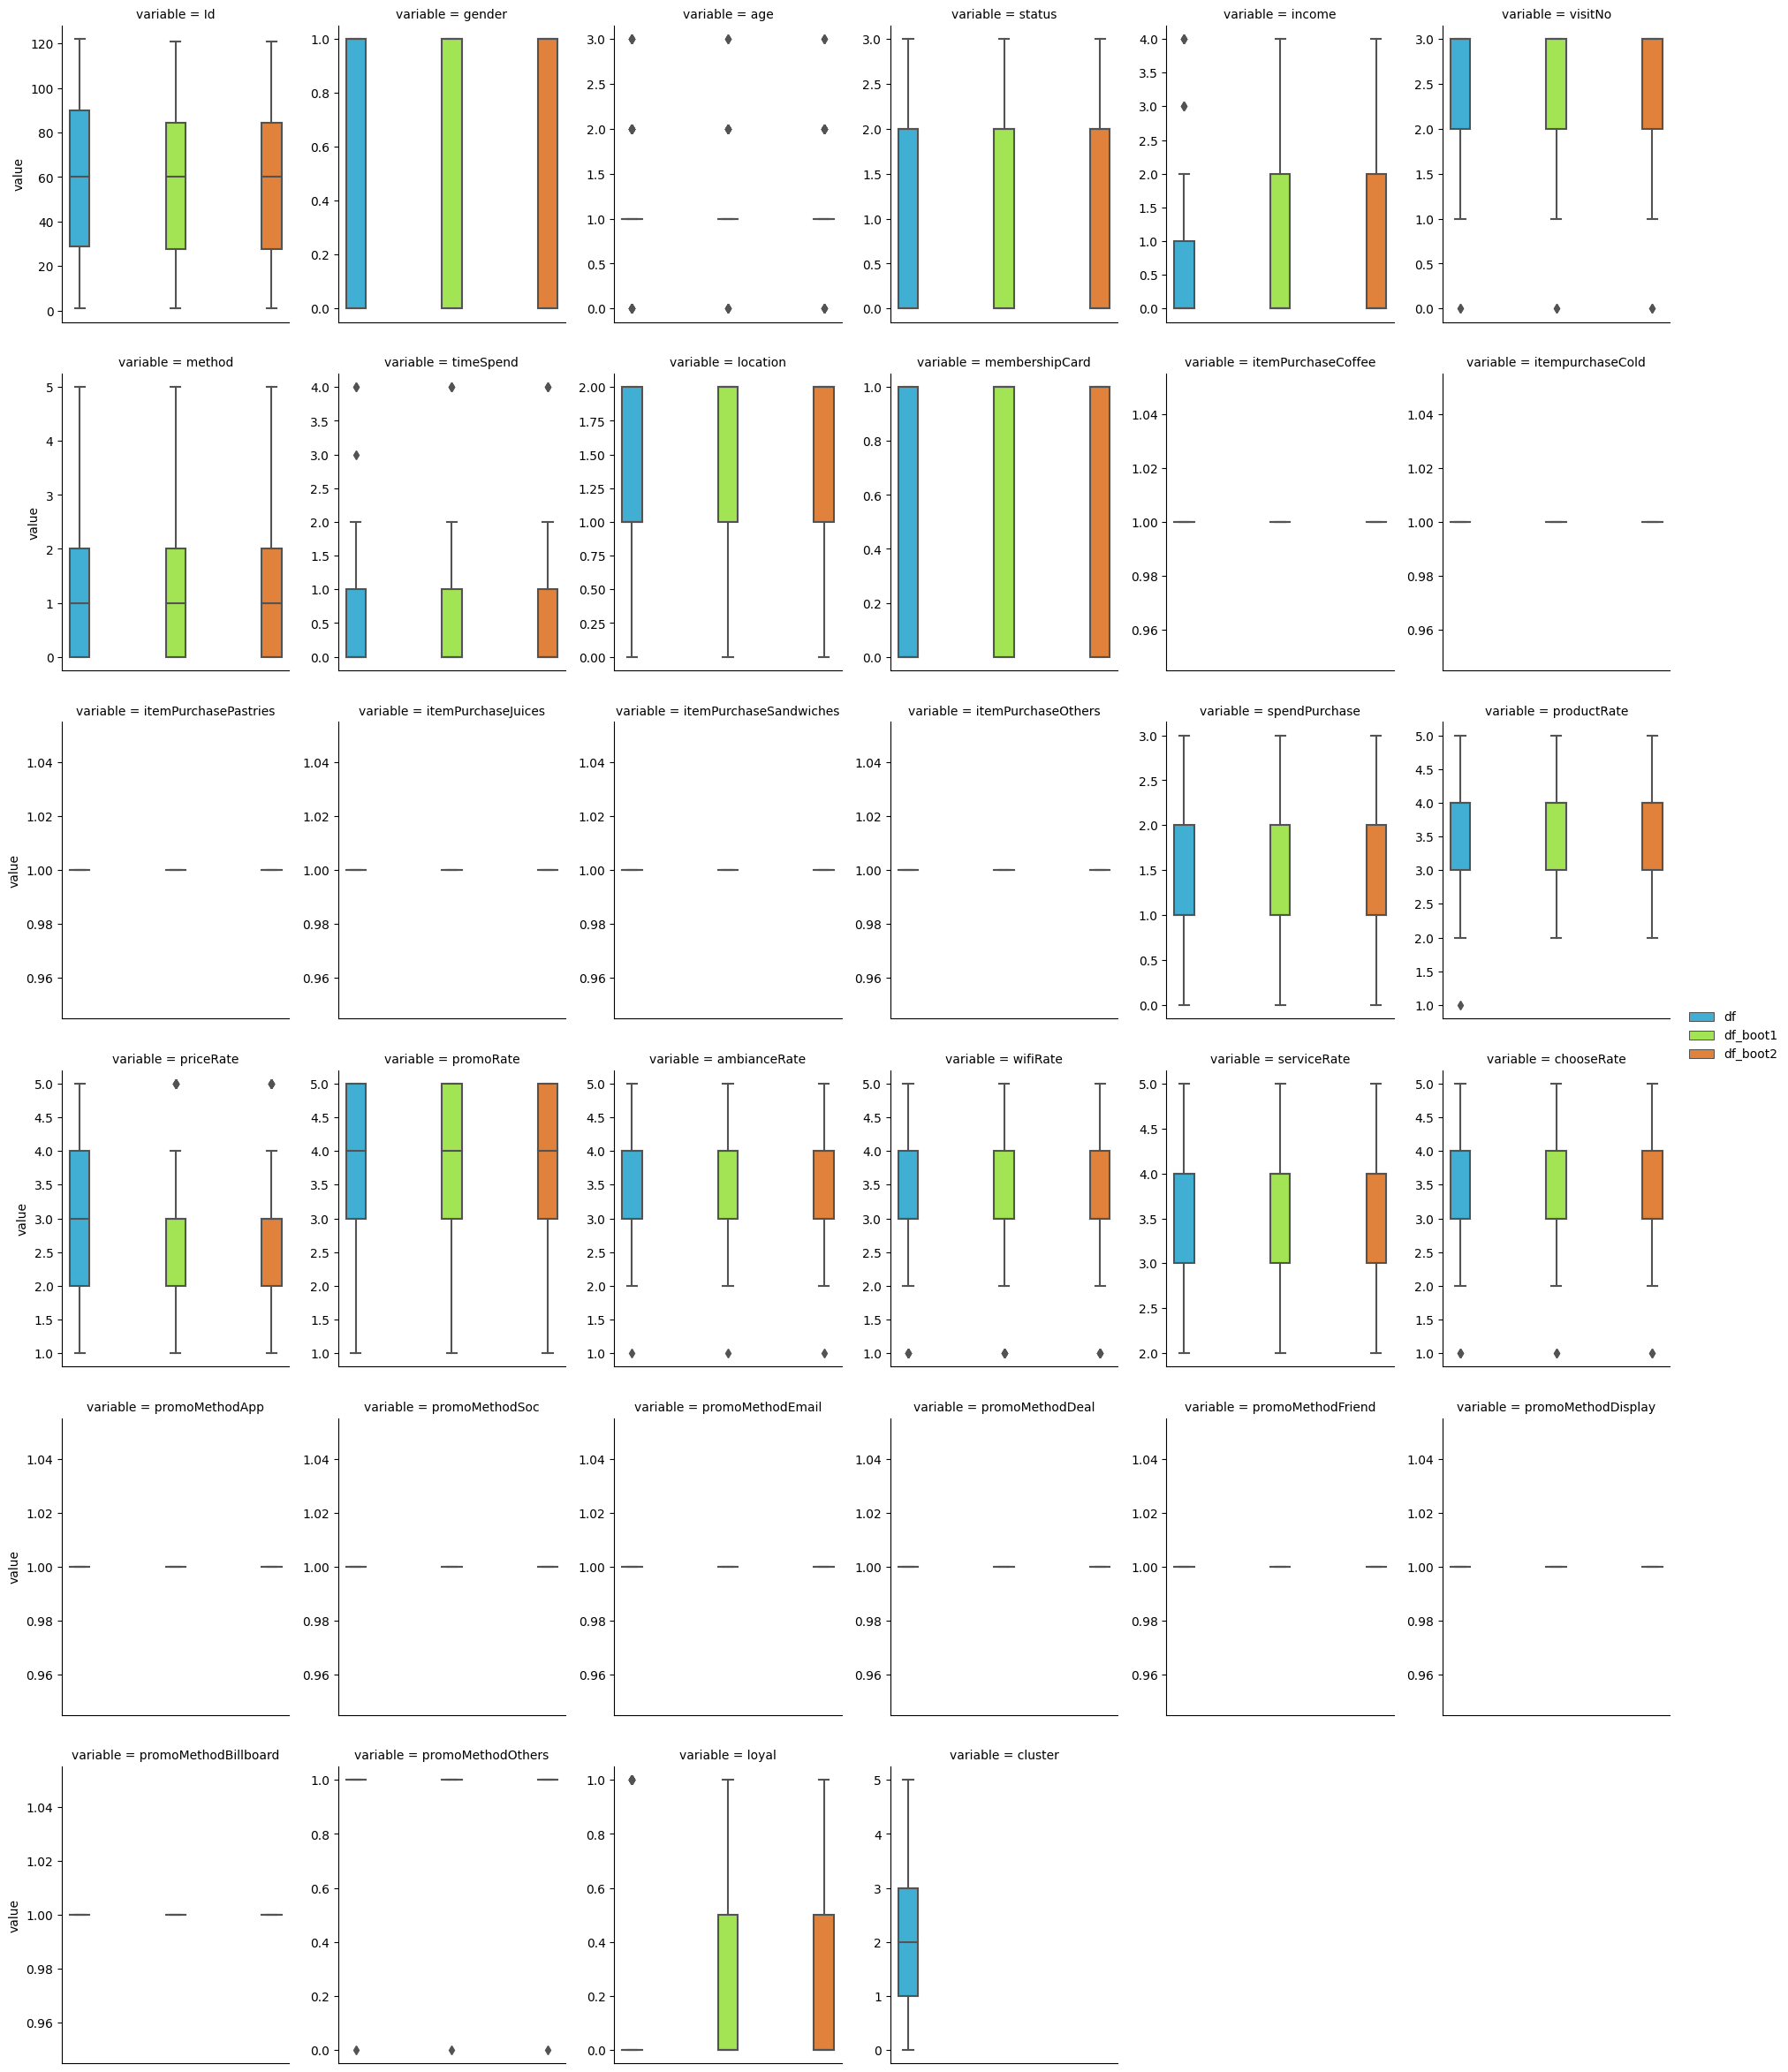

In [101]:
# box plot for original vs boot1 vs boot2
fig = plt.figure()
plt.figure(figsize=(100,50))
df2 = pd.concat({'df': df.melt(), 'df_boot1': df_boot1.melt(), 'df_boot2': df_boot2.melt()}, names=['source', 'old_index'])
df2 = df2.reset_index(level=0).reset_index(drop=True)

t = sns.catplot(data=df2, kind='box', col='variable', y='value', x='source', palette='turbo',hue='source', legend = 'brief', height=4, aspect=0.8, col_wrap=6, sharey=False)
t.set(xlabel='', xticks=[]) # remove x labels and ticks
t.add_legend()

Comparing the statistics for the original dataset and the bootstrapped dataset, we get very similar results. The loyal attribute for the bootstrapped sample shows higher mean and standard deviation than the original sample so we can infer that there may be some sampling error due to the income and priceRate columns having visibly different distributions.

While bootstrapping is a powerful technique, the quality of the results depends on the quality of the original dataset and the assumptions made about the data. Additionally, the number of bootstrap resamples should be chosen carefully to balance computational resources and accuracy. More resamples generally lead to more accurate estimates but also require more computation time.

# Conclusion

The choice of sampling method depends on your research goals, the characteristics of your dataset, and the resources available. It's essential to select the appropriate sampling method to ensure that your sample is representative and unbiased, allowing you to draw valid conclusions from your analysis.

# References

1. Sckit learn offcial documentation
2. Refered Towards Data Science
3. Eli5 official documentation
4. https://www.techtarget.com/searchbusinessanalytics/definition/data-sampling
5. https://www.kaggle.com/code/jardelnascimento/simple-random-sampling/notebook
6. https://www.kaggle.com/code/jardelnascimento/systematic-sampling
7. https://www.kaggle.com/code/jardelnascimento/cluster-sampling
8. https://www.kaggle.com/code/jardelnascimento/stratified-sampling
9. https://www.kaggle.com/code/jjmewtw/bootstrap-for-small-sample-estimation-83-6

The algorithms were referred directly from the **Sckit learn official documentation**. Visualization was referred from the  Machine Learning with scikit-learn Quick Start Guide and **Towards Data Science** (How do you check the quality of your regression model in Python?).  The remaining code was written independently. Feature importance reference is taken from **eli5 offical documentation**
